<a href="https://colab.research.google.com/github/Uditsingh7/Machine_Learning_Projects/blob/main/Udit_Scikit_Learn_ML_from_Start_to_Finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning from Start to Finish with Scikit-Learn
This notebook covers the basic Machine Learning process in Python step-by-step. Go from raw data to at least 78% accuracy on the Titanic Survivors dataset.

Steps Covered

```
Importing a DataFrame
Visualize the Data
Cleanup and Transform the Data
Encode the Data
Split Training and Test Sets
Fine Tune Algorithms
Cross Validate with KFold
Upload to Kaggle

```



### CSV to DataFrame
CSV files can be loaded into a dataframe by calling pd.read_csv . After loading the training and test files, print a sample to see what you're working with.

In [5]:
# The very foundation of our expedition: Importing the essential tools.
# NumPy, for the mathematical bedrock of our data.
import numpy as np
# Pandas, our trusty DataFrame vessel, to navigate the seas of information.
import pandas as pd
# Matplotlib and Seaborn, our artistic lenses, to visualize the unseen currents of fate.
import matplotlib.pyplot as plt
import seaborn as sns
# Setting our stage for immediate visual feedback, like a director's monitor.
%matplotlib inline

# Here, the raw data, the very logs of the Titanic's passenger manifest, are loaded.
# data_train: The known fates, the past that guides our future predictions.
data_train = pd.read_csv('./train.csv')
# data_test: The unknown fates, the future we dare to predict.
data_test = pd.read_csv('./test.csv')

# A first, chilling glimpse into the lives captured within our data.
# We sample three random souls, a microcosm of the grand tragedy and triumph.
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S


### Visualizing Data
Visualizing data is crucial for recognizing underlying patterns to exploit in the model.

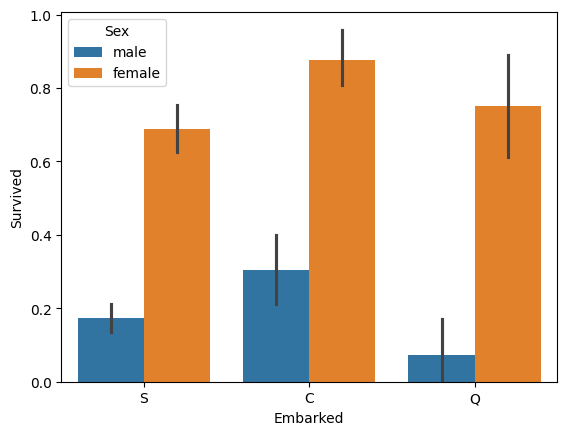

In [6]:
# Unveiling the fate tied to embarkation!
# This bar plot is our first major scene, revealing how the port of departure
# and the very gender of a passenger played a role in who would survive.
# 'Embarked': From which port did they embark on this fateful journey? S, C, or Q?
# 'Survived': The ultimate question, represented as a proportion.
# 'Sex': The crucial distinction, separating the destinies of men and women.
# data_train: Our historical record, from which we draw these profound insights.
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

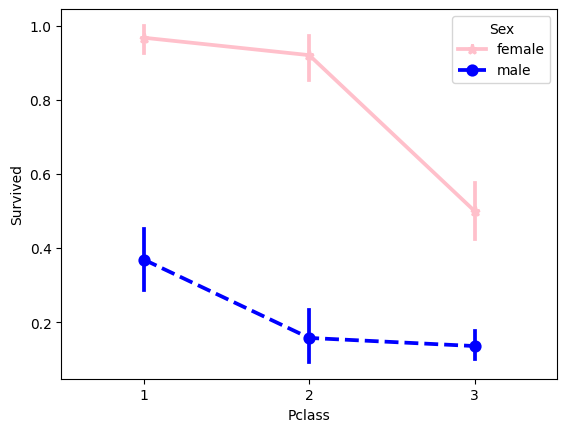

In [7]:
# The social strata of the Titanic: A dramatic revelation!
# This point plot cuts deep into the heart of the matter,
# exposing the stark realities of 'Pclass' (Passenger Class) against 'Survived'.
# Observe the destiny woven into each class, dramatically differentiated by 'Sex'.
# The palette: "male" in stoic blue, "female" in poignant pink, mirroring their divergent fates.
# Markers and linestyles: Distinct visual cues to emphasize the narrative unfolding before us.
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [8]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


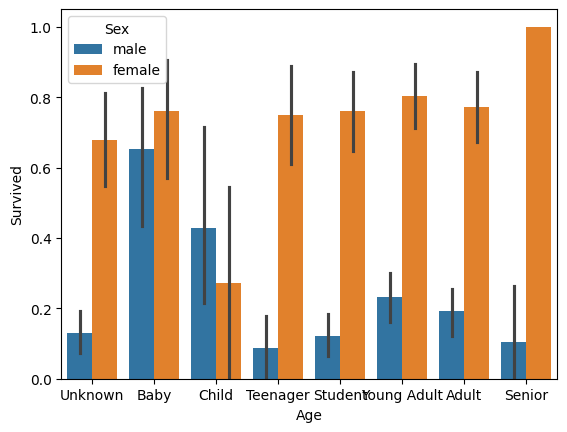

In [9]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

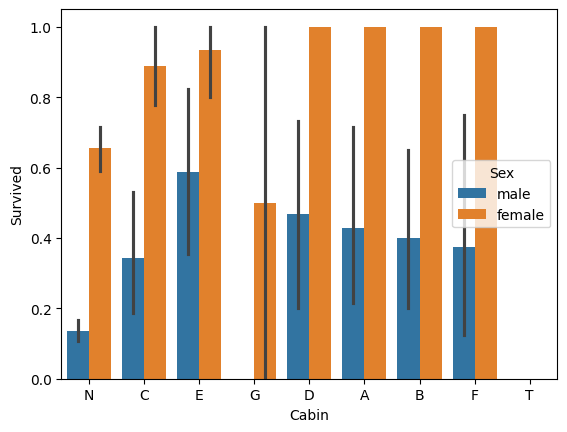

In [10]:
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train);

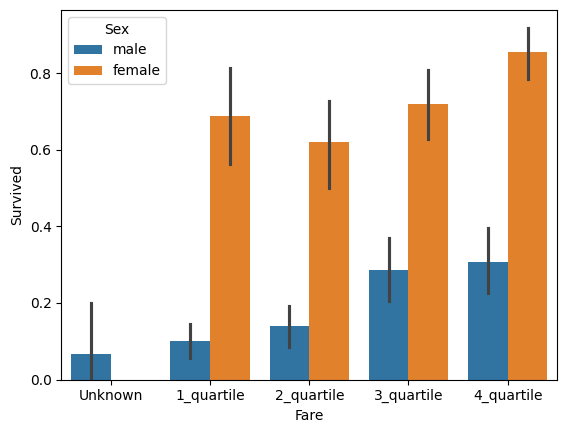

In [11]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=data_train);

In [12]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19



Splitting up the Training Data
Now its time for some Machine Learning.

First, separate the features(X) from the labels(y).

X_all: All features minus the value we want to predict (Survived).

y_all: Only the value we want to predict.

Second, use Scikit-learn to randomly shuffle this data into four variables. In this case, I'm training 80% of the data, then testing against the other 20%.

Later, this data will be reorganized into a KFold pattern to validate the effectiveness of a trained algorithm.

In [13]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

### Fitting and Tuning an Algorithm
Now it's time to figure out which algorithm is going to deliver the best model. I'm going with the RandomForestClassifier, but you can drop any other classifier here, such as Support Vector Machines or Naive Bayes.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier is an ensemble meta-estimator that fits a number of decision tree classifiers
# on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
# Key technical aspects:
# 1. Bagging: Training on random subsets of data.
# 2. Feature Randomness: Splitting nodes based on random subsets of features.
# 3. Voting: The final prediction is the majority vote of the trees.


### Hyperparameter Tuning with GridSearchCV
We will now define a grid of hyperparameters and use `GridSearchCV` to exhaustively search for the best combination. This ensures our `RandomForestClassifier` is optimized for the training data.

In [16]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Define the parameter grid to search over
# n_estimators: The number of trees in the forest.
# max_features: The number of features to consider when looking for the best split.
# criterion: The function to measure the quality of a split ('entropy' or 'gini').
# max_depth: The maximum depth of the tree.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
parameters = {
    'n_estimators': [4, 6, 9],
    'max_features': ['log2', 'sqrt'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

# Define the scoring metric (accuracy) to evaluate the models
acc_scorer = make_scorer(accuracy_score)

# Initialize GridSearchCV
# This object will test the classifier with all combinations of the parameters above
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)

# Fit the grid search object to the training data
# This process may take a moment as it trains multiple models
grid_obj = grid_obj.fit(X_train, y_train)

# Retrieve the best estimator (model) found by the grid search
clf = grid_obj.best_estimator_

# Fit the best estimator to the training data to ensure it's ready for prediction
clf.fit(X_train, y_train)

print(f"Best parameters found: {grid_obj.best_params_}")
print("Model training complete.")

Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}
Model training complete.


In [17]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8268156424581006


### Validate with KFold
Is this model actually any good? It helps to verify the effectiveness of the algorithm using KFold. This will split our data into 10 buckets, then run the algorithm using a different bucket as the test set for each iteration

In [20]:
from sklearn.model_selection import KFold

def run_kfold(clf):
    # KFold now resides in model_selection and takes n_splits
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0

    # We iterate using kf.split(data)
    for train_index, test_index in kf.split(X_all):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

run_kfold(clf)

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.8314606741573034
Fold 3 accuracy: 0.7752808988764045
Fold 4 accuracy: 0.8539325842696629
Fold 5 accuracy: 0.8651685393258427
Fold 6 accuracy: 0.8089887640449438
Fold 7 accuracy: 0.8202247191011236
Fold 8 accuracy: 0.797752808988764
Fold 9 accuracy: 0.8764044943820225
Fold 10 accuracy: 0.7752808988764045
Mean Accuracy: 0.818227215980025


### Predict the Actual Test Data
And now for the moment of truth. Make the predictions, export the CSV file, and upload them to Kaggle.

In [21]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
